# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **weather phenomena** (see below) for the region of **Ann Arbor, Michigan, United States**, or **United States** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Ann Arbor, Michigan, United States** to Ann Arbor, USA. In that case at least one source file must be about **Ann Arbor, Michigan, United States**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Ann Arbor, Michigan, United States** and **weather phenomena**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **weather phenomena**?  For this category you might want to consider seasonal changes, natural disasters, or historical trends.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplleaflet
import mpl_toolkits.axes_grid1.inset_locator as mpl_il
import math
import datetime

def assignment4():

    #TIPO DE CAMBIO - PRECIO COBRE (USD/LIB)
    df_raw = pd.read_excel("Tipo de cambio.xlsx", header = None, footer = None)
    df_usd = df_raw.drop([0,1,2],axis=0)
    df_usd.dropna(inplace=True)
    df_usd.columns = ['Date', 'Exchange rate']
    df_usd['Exchange rate'] = df_usd['Exchange rate'].apply(lambda x: round(x,1))
    df_usd['Date'] = pd.to_datetime(df_usd['Date']).dt.to_period('M')

    df_raw = pd.read_excel("precio cobre refinado.xlsx", header = None, footer = None)
    df_cu = df_raw.drop([0,1],axis=0)
    df_cu.dropna(inplace=True)
    df_cu.columns = ['Date', 'Copper (USD/Lbs)']
    df_cu['Copper (USD/Lbs)'] = df_cu['Copper (USD/Lbs)'].apply(lambda x: round(x,1))
    df_cu['Date'] = pd.to_datetime(df_cu['Date']).dt.to_period('M')

    #TASA DE DESOCUPACIÓN
    df_raw = pd.read_excel("Mercado Laboral y Demografía - Banco Central.xlsx", header = None, footer = None)
    df_un = df_raw.drop([1,3,5,6,7],axis=1).drop([0,1,2],axis=0)
    df_un.dropna(inplace=True)
    df_un.columns = ['Date','Total workforce per thousands', 'Unoccupied']
    df_un['Unoccupied (%)'] = np.divide(df_un['Unoccupied'],df_un['Total workforce per thousands']).apply(lambda x: round(x*100,1))
    df_un = df_un.drop('Unoccupied',axis=1)
    df_un['Date'] = pd.to_datetime(df_un['Date']).dt.to_period('M')

    df_raw = pd.read_excel("Tasa desocupacion antofa.xlsx", header = None, footer = None)
    df_un_antofa = df_raw.drop([0,1,2],axis=0)
    df_un_antofa.dropna(inplace=True)
    df_un_antofa.columns = ['Date', 'Unoccupied (%) - Antofagasta region']
    df_un_antofa['Unoccupied (%) - Antofagasta region'] = df_un_antofa['Unoccupied (%) - Antofagasta region'].apply(lambda x: round(x,1))
    df_un_antofa['Date'] = pd.to_datetime(df_un_antofa['Date']).dt.to_period('M')

    #IMACEC
    df_raw = pd.read_excel("excel_imacec.xlsx", header = None, footer = None)
    df_imacec = df_raw.drop([0,1,2,3,4,5,7],axis=0)
    df_imacec.dropna(inplace=True)
    df_imacec.drop([2],axis=1,inplace=True)
    df_imacec.columns = ['Date', 'Imacec rate']
    df_imacec['Imacec rate'] = df_imacec['Imacec rate'].apply(lambda x: round(x,1))
    df_imacec['Date'] = pd.to_datetime(df_imacec['Date']).dt.to_period('M')

    #MERGE
    df = pd.merge(df_un,df_usd,how='inner', on='Date')
    df = pd.merge(df,df_un_antofa,how='inner',on='Date')
    df = pd.merge(df_imacec,df,how='inner',on='Date')
    df = pd.merge(df,df_cu,how='inner',on='Date')
    df = df[['Date','Imacec rate','Total workforce per thousands','Unoccupied (%)',\
             'Unoccupied (%) - Antofagasta region','Exchange rate','Copper (USD/Lbs)']]
    x = np.arange(0,len(df),1)
    fig, (ax1,ax2) = plt.subplots(2)
    fig.set_size_inches(18.5, 10.5)

    plt.style.use('seaborn')

    #Unoccupied - Imacec
    ax1.fill_between(x,df['Unoccupied (%)'], color="skyblue", alpha=0.4,label='Unoccupied Chilean people rate - Nationally')
    plt.setp([ax1,ax2], xticks=range(0,len(df),12), xticklabels=df['Date'][0:-1:12])

    ax1.plot(x,df['Unoccupied (%) - Antofagasta region'],\
            color='steelblue', linestyle='dashed',label='Unoccupied Chilean people rate - Antofagasta region')
    ax1.set_ylabel('Unoccupied people rate')
    ax1.grid(False)
    ax1.legend(loc='upper left')

    ax11 = ax1.twinx()
    ax11.plot(x,df['Imacec rate'],color='red')
    ax11.set_ylabel('Imacec rate')
    ax11.grid(False)

    ax1.set_title('Anual unnocupied Chilean people rate in Antofagasta region and Monthly Index of Economic Activity (Imacec rate). Period: 2014 - 2021. Data from central bank of Chile')
    plt.tight_layout()
    ax1.axis([-0.5,len(df),0, df['Unoccupied (%)'].max()*1.1])
    ax1.tick_params(axis='y', colors='steelblue')
    ax11.axis([-0.5,len(df), df['Imacec rate'].min()*1.2, df['Imacec rate'].max()*1.2])
    ax11.tick_params(axis='y', colors='red')
    ax11.legend(loc='upper right')

    #Exchange rate USD - Copper price
    ax2.plot(x,df['Exchange rate'],color='skyblue')
    ax2.grid(False)
    ax22 = ax2.twinx()
    ax22.plot(x,df['Copper (USD/Lbs)'],color='red')
    ax22.grid(False)
    ax2.set_title('Anual Chilean currency exchange rate per USD and Copper value (USD/Lbs). Period: 2014 - 2021. Data from central bank of Chile')
    ax2.legend(loc='upper left')
    plt.tight_layout()
    ax2.axis([-0.5,len(df),0, df['Exchange rate'].max()*1.1])
    ax22.axis([-0.5,len(df), df['Copper (USD/Lbs)'].min()*0.9, df['Copper (USD/Lbs)'].max()*1.2])
    ax2.tick_params(axis='y', colors='steelblue')
    ax22.tick_params(axis='y', colors='red')
    ax22.legend(loc='upper right')
    ax2.set_ylabel('USD to CLP exchange rate')
    ax22.set_ylabel('Price of refined copper BML (dollars / pound)')
    
    plt.savefig('Assignment4.png')
    
    return plt.show()

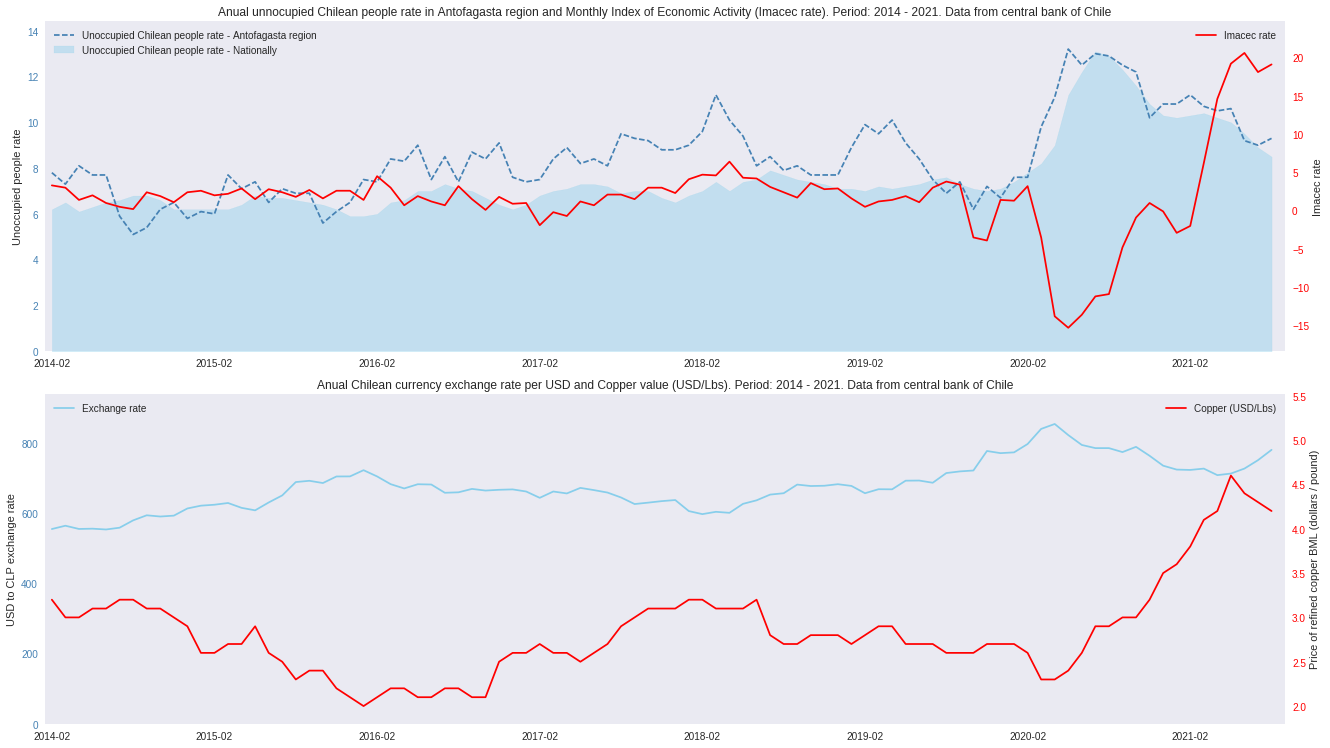

In [5]:
assignment4()

In [ ]:
#menos personas satisfacen demanda mayor. Se hicieron más eficientes, bajaron costos con reduccion de personal. Entonces + actividad comercial, empresas con menor staff, de ahí que el primer grafo que imacec sube en 2021 y desempleo baja a menor rate (a diferencia del spike de desempleo en conjunto con el spike inverso de imacec). Producen a menor costo